In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

data = digits['data']
target = digits['target']
target_names = digits['target_names']
images = digits['images']

4 Data Generation with QDA
======

Making use of the fact, that QDA is a generative model, creating new data with it.

Choose therefore 2 digits from the digit data set. We will again use the digits 1 and 7.

In [3]:
mask_1and7 = (target == 1) | (target == 7)
training_labels = target[mask_1and7]
training_features = data[mask_1and7]

In [4]:
def fit_qda(training_features, training_labels):
    
    #Define N_k and x_i according to the respective k 
    N1 = len(training_labels[training_labels==1])
    N7 = len(training_labels[training_labels==7])
    xi1 = training_features[training_labels==1]
    xi7 = training_features[training_labels==7]
    
    #Compute the mean mu for the two classes
    mean1 = np.mean(xi1, axis=0)
    mean7 = np.mean(xi7, axis=0)
    mu = np.array([mean1, mean7])
    
    #Compute the two covariance matrices
    covmat1 = 1/N1 * (xi1 - mean1).T.dot(xi1 - mean1)
    covmat7 = 1/N7 * (xi7 - mean7).T.dot(xi7 - mean7)
    covmat = np.array([covmat1, covmat7])
    
    #compute the two prior probabilities of the two classes
    p1 = N1/len(training_labels)
    p7 = N7/len(training_labels)
    p = np.array([p1,p7])    
    
    return mu, covmat, p

<span style ="color:green;font-weight:bold ">Assume same function from last exercise sheet, no comments needed for the fit_qda function, as was already commented on previou sheet. </span >

Caling the fit_qda() again to obtain mu, covmat and p for the full 64-dim feature vectors.

In [5]:
mu, covmat, p = fit_qda(training_features, training_labels)

Generate new data from the means and the covariance matrices via the function np.random.multivariate_normal(). We create 8 new instances and form them into 8x8 images to plot them with a gray scale. 

Text(0.5, 1.0, 'The new generated images of the digit 1')

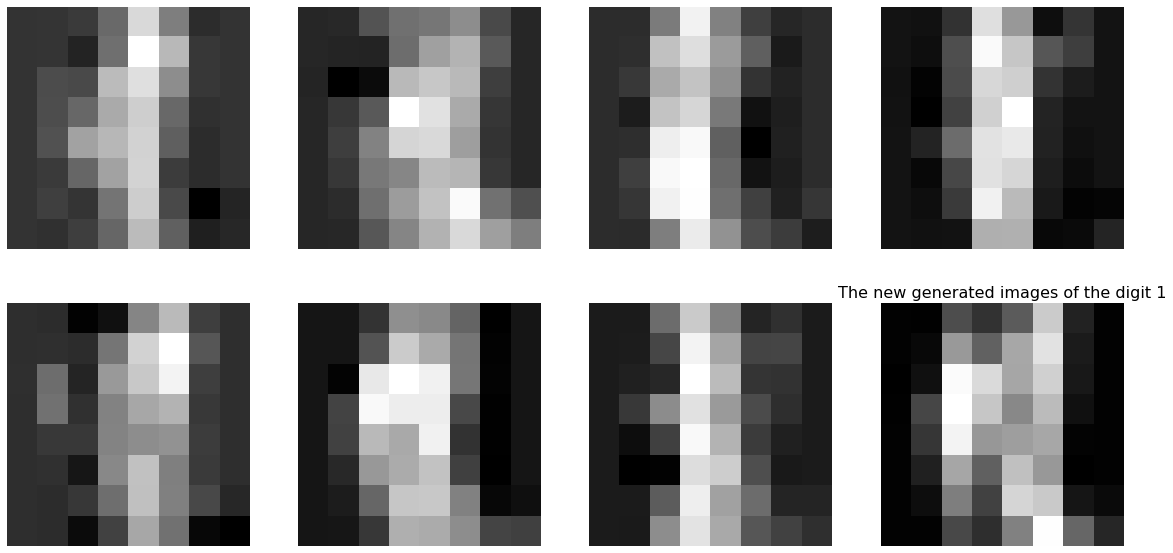

In [6]:
#Gernerate new data and reshape them into images
new_ones = np.random.multivariate_normal(mu[0], covmat[0], 8)
img1 = new_ones.reshape((8,8,8))

#Visualizing the new data
plot_index = np.array([241, 242, 243, 244, 245, 246, 247, 248])

fig = plt.figure(figsize = (20, 10))
for i in range(len(plot_index)):
    index = plot_index[i]
    plt.subplot(index)
    plt.gray()
    plt.axis('off')
    plt.imshow(img1[i], interpolation = 'nearest') 
plt.title('The new generated images of the digit 1', fontsize=16)


<span style ="color:green;font-weight:bold ">Comments:  
    - use plt.suptitle so that title is aboove all images  
    - the generation of samples is better than in the solution code, as all 8 samples are created at once and are then reshaped at once instead of in each loop iteration when they are shown  
    -  the rest of the code is equivalent to the solution code  </span >

Text(0.5, 1.0, 'The new generated images of the digit 7')

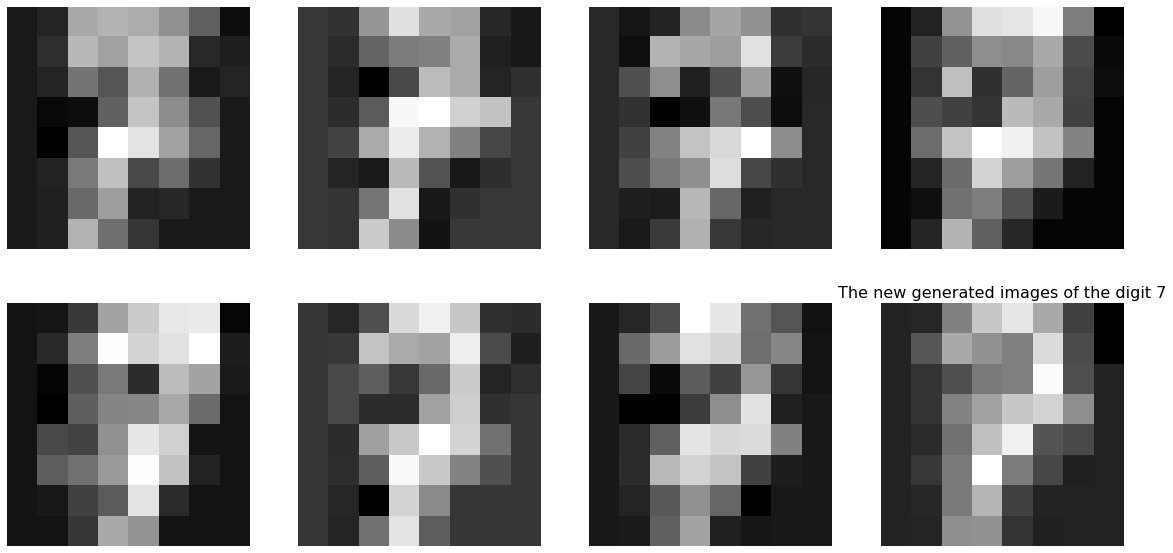

In [7]:
#Gernerate new data and reshape them into images
new_sevens = np.random.multivariate_normal(mu[1], covmat[1], 8)
img7 = new_sevens.reshape((8,8,8))

#Visualizing the new data
plot_index = np.array([241, 242, 243, 244, 245, 246, 247, 248])

fig = plt.figure(figsize = (20, 10))
for i in range(len(plot_index)):
    index = plot_index[i]
    plt.subplot(index)
    plt.gray()
    plt.axis('off')
    plt.imshow(img7[i], interpolation = 'nearest')
plt.title('The new generated images of the digit 7', fontsize=16)

<span style ="color:green;font-weight:bold ">Comments:  
    - same comments as for the previous number  
    - more elegant if all numbers in one loop as done in solution code </span >

Comparison of the means of the original data and the new generated data by QDA

Text(0.5, 1.0, 'The average of the newly generated images of digit 7')

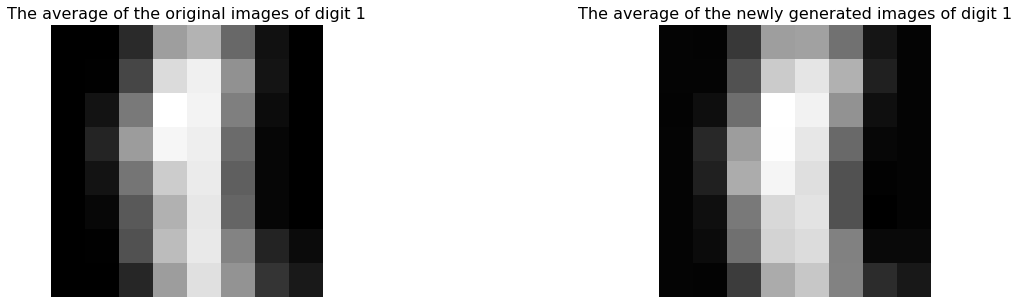

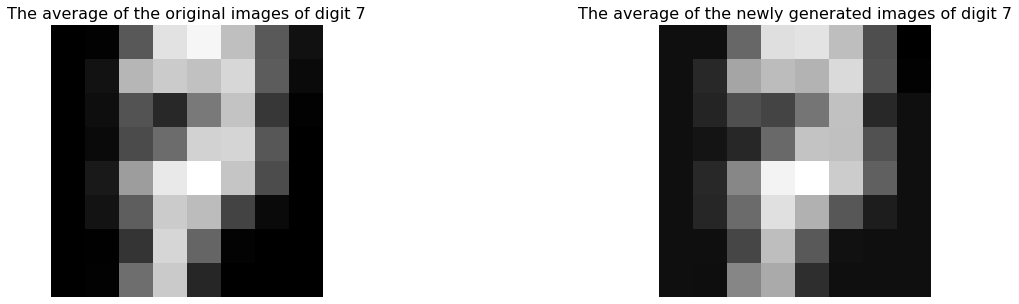

In [8]:
img_origin_1 = images[target==1]
img_origin_7 = images[target==7]

img1_origin_mean = np.mean(img_origin_1, axis=0)
img7_origin_mean = np.mean(img_origin_7, axis=0)

img1_new_mean = np.mean(img1, axis=0)
img7_new_mean = np.mean(img7, axis=0)


fig = plt.figure(figsize = (20, 5))
plt.subplot(121)
plt.gray()
plt.axis('off')
plt.imshow(img1_origin_mean, interpolation = 'nearest') 
plt.title('The average of the original images of digit 1', fontsize=16)

plt.subplot(122)
plt.gray()
plt.axis('off')
plt.imshow(img1_new_mean, interpolation = 'nearest') 
plt.title('The average of the newly generated images of digit 1', fontsize=16)


fig = plt.figure(figsize = (20, 5))
plt.subplot(121)
plt.gray()
plt.axis('off')
plt.imshow(img7_origin_mean, interpolation = 'nearest') 
plt.title('The average of the original images of digit 7', fontsize=16)

plt.subplot(122)
plt.gray()
plt.axis('off')
plt.imshow(img7_new_mean, interpolation = 'nearest') 
plt.title('The average of the newly generated images of digit 7', fontsize=16)

<span style ="color:green;font-weight:bold ">Comments:  
    - not necessary for the exercise but still interesting  
    - plotting could be done in loop so that there is less code </span >

The average images are suited for making a good comparison between the original and new data. For the ones one can clearly see, that there is mainly the bar generated but not the characteristic may be missing in the noise. The same can be said for the seven. The number is visible, but the edges are not that sharp. The background pixels even seem a little bit brighter as for the original images due to non zero values (higher noise). Also the 8 new images for every digit displaying the numbers 1 and 7 but it is hard to see, if you dont know. Sometimes the noise is high or typical markers of the corresponding digit are missing. On the other hand some images are quite good generated. So it is possible to create data with QDA but not the best data. 

<span style ="color:green;font-weight:bold ">Comments:  
    -  Missing reasons for why results are not very good (such as that the distributions are done for a pixel and could take into account foreground and backgroud or that the covariance matrix only looks at the relation between two pixels and not whole groups of pixel).  
    - I thought is was nice to see mean images as it gave a further source of information on qda. </span >